#### Import libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Define plot saving function

In [5]:
# Setting up default settings for plots, rc = Runtime configuration

plt.rc('figure',figsize = (10,6))          
plt.rc('font',size =14)                    # Defining font size for all texts (unless overriden)
plt.rc('xtick', labelsize = 14)            # you know what tick and tick_label is right?
plt.rc('ytick', labelsize = 14)
plt.rc('axes',labelsize= 14, titlesize= 16, titleweight = 'bold')   # Defining config of Xaxis, Yaxis and title

#### Get the dataset

In [6]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784',version=1)
X,y = np.array(mnist['data']), np.array(mnist['target'])
X.shape,y.shape

((70000, 784), (70000,))

#### Train-Test split

In [7]:
# Train-Test Split
X_train,X_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]

In [8]:
def plot_image(image_data):
    image_data = image_data.reshape(28,28)
    plt.imshow(image_data,cmap='binary')
    plt.axis(False)
    

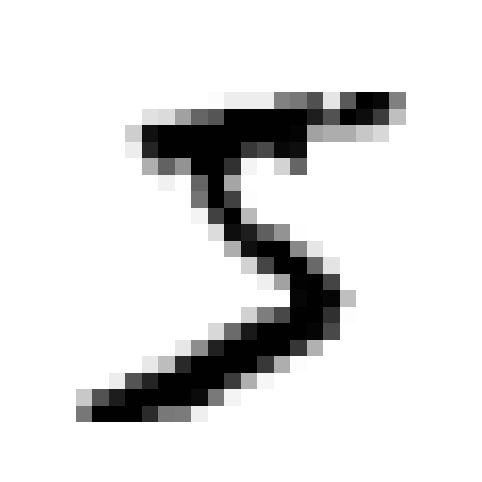

In [9]:
plot_image(X[0])

# _Multiclass Classification/Multinomial Classification_

There are two ways in which we can perform multiclass classification 
1. Use multiclass classifiers
2. Use multiple binary classifiers

There are two ways to use binary classifiers for multiclass classification
1. OvR (One vs Rest/One vs All) 
    - We train one binary classifier for each class
    - Each classifier learn to detect "that class" or "not that class"
    - During prediction, all the classifiers run, one with the highest score decides the final class

    eg. In this dataset, we will train 10 binary classifier for all 10 classes(0-9), 1st classifier give score for any image to be "0"or"Not 0", 1st will give score for "1"or"not 1" and so on...

2. OvO (One vs One)
    - We train one binary classifier for each pair of classes
    - For _n_ number of classes we get <sup>n</sup>C<sub>2</sub> = $\frac{(n)*(n-1)}{2}$
    - During prediction, each model gives its vote and the class with most number of votes is selected

    eg. In this dataset, we will train 10*9/2 = 45 binary classifiers that will vote to give final output (predict class), 1st classifier is trained on "0"or"1", 2nd on "0"or"2" and so on....


#### ___OvR (One-vs-Rest) Strategy___
- Use when:
    - You have many classes.
    - The classifier is fast to train (e.g., Logistic Regression, Naive Bayes).
    - You're dealing with large datasets.

- Avoid when:
    - Your classifier struggles with imbalanced data.
    - You want to handle very fine decision boundaries.

#### ___OvO (One-vs-One) Strategy___
- Use when:
    - You have fewer classes (like ≤10–15).
    - You’re using slow-to-train models like SVM, where small datasets are ideal.
    - You need high accuracy on well-separated classes.

- Avoid when:
    - Number of classes is large (you’ll end up with too many classifiers).
    - Dataset is huge (due to computation overhead).

### How they works? 
suppose you have dataset with classes A,B,C

- __OvR__  : train 3 classifiers that gives score for final decision
    1. classifier : A vs (B+C)
    2. classifier : B vs (A+C)
    3. classifier : C vs (A+B) 

- __OvO__ : train 3 classifiers that gives vote for final decision
    1. classifier : A vs B
    2. classifier : B Vs C
    3. classifier : C vs A


Finally : 
1. If the data is huge, use OvO. Because it trains classifiers on small subsets (only two classes at a time)
2. If algorithm can handle large data smoothly, prefer OvR. 
3. _sklearn handles this automatically_ - it chooses which one to use itself

#### ___SVC (Support Vector Machines Classifier)___ 

In [10]:
#From support vector machines import support vector machine classifier
from sklearn.svm import SVC

svm_classifier = SVC(gamma='auto',random_state=42)
svm_classifier.fit(X_train[:1000],y_train[:1000])   # note that → y_train (0-9), not y_train_5 

# We are fitting only first 1000 instances cuz it will take fking long time for complete dataset

SVC(gamma='auto', random_state=42)

In [11]:
some_digit = X[0]
svm_classifier.predict([some_digit])

array(['5'], dtype=object)

Under the hood,  
Scikit-Learn actually used the OvO strategy: it trained 45 binary classifiers, got their
decision scores for the image, and selected the class that won the most duels.

In [12]:
# Check the scores
some_digit_scores = svm_classifier.decision_function([some_digit])
some_digit_scores

array([[ 2.81585438,  7.09167958,  3.82972099,  0.79365551,  5.8885703 ,
         9.29718395,  1.79862509,  8.10392157, -0.228207  ,  4.83753243]])

Now, unlike binary classifier(where we get one score), here we have 10 scores for each instance!  
but, wait!......  
There are 45 classifiers working in backend right? each classifier should give its score? No!  
Only those classifiers that are trained for X vs 5, give their scores. (To get the score of 5 you dont want scores from 3 vs 2 classifier right?)  
Thats why we get 10 scores for each instance, since there are 10 classes.

In [13]:
np.argmax(some_digit_scores)

np.int64(5)

#### ___If you want to decide to choose OvR or OvO___

Use OneVsRestClassifier or OneVsOneClassifier and give classifier to its constructor

In [14]:
from sklearn.multiclass import OneVsRestClassifier
ovr_svm_clf = OneVsRestClassifier(SVC(gamma="auto", random_state=42))
ovr_svm_clf.fit(X_train[:1000], y_train[:1000])

OneVsRestClassifier(estimator=SVC(gamma='auto', random_state=42))

In [15]:
print(ovr_svm_clf.predict([some_digit]))

['5']


In [16]:
(ovr_svm_clf.estimators_)
# It shows the estimators that are used in classification
# 10 estimators (binary classifiers)

[SVC(gamma='auto', random_state=42),
 SVC(gamma='auto', random_state=42),
 SVC(gamma='auto', random_state=42),
 SVC(gamma='auto', random_state=42),
 SVC(gamma='auto', random_state=42),
 SVC(gamma='auto', random_state=42),
 SVC(gamma='auto', random_state=42),
 SVC(gamma='auto', random_state=42),
 SVC(gamma='auto', random_state=42),
 SVC(gamma='auto', random_state=42)]

### ___SGD classifier___

In [17]:
from sklearn.linear_model import SGDClassifier

sgd_classifier = SGDClassifier(random_state=42)
sgd_classifier.fit(X_train[:1000],y_train[:1000])

SGDClassifier(random_state=42)

In [ ]:
#This would have took 30 mins to run, if i let it fit all 60000 instances

In [18]:
sgd_classifier.predict([some_digit])

array(['5'], dtype='<U1')

In [19]:
sgd_classifier.decision_function([some_digit])

array([[-6049581.97985829, -6138036.45541781, -3886281.38604606,
         -604692.42366776, -6948311.32017537,   914498.2913215 ,
        -6855666.78647961, -3866146.33271573, -4016434.08430155,
        -3209136.89074954]])

In [24]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(sgd_classifier,X_train[:1000],y_train[:1000],cv=3,scoring='accuracy')
scores

array([0.83233533, 0.82882883, 0.79279279])

SGD_classifier even here gives a high accuracy,  
and since this data is not as so much skewed or imbalanced, we can rely on accuracy this time

In [28]:
# But with Feature Scaling, we can increase the accuracy
from sklearn.preprocessing import StandardScaler

std_scalar = StandardScaler()
std_scalar.fit_transform(X_train,y_train)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(60000, 784))

In [ ]:
scores = cross_val_score(sgd_classifier,X_train[:1000],y_train[:1000],cv=3,scoring='accuracy')
scores